# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Regresión Lineal Simple

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [17]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values # años de exp
y = dataset.iloc[:, 1].values # salario
# Nos muestra el salario de cada empleado según sus años de experiencia
y[:]

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) # seleccionamos el test_size según la (poca) cantidad de datos que tengamos (30)
# Recordar que ante un mismo random_state, misma distribución de datos para train/test y mismos resultados

In [21]:
result = pd.DataFrame({'Column1': X[:,0], 'Column2': y[:]})
result

,Column1,Column2
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Escalado de variables

In [ ]:
# En Regresión Lineal Simple no hace falta aplicar ningún reescalado a los datos (como hay solo una variable independiente, no se priorizará sobre ninguna otra para la obtención de la ecuación)
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# Buscamos de todas las rectas posibles, la que mejor se ajusta a estos datos (minimizando su distancia con respecto a las observaciones)
# Queremos predecir el sueldo de cada empleado según sus años de experiencia. Obtendremos el modelo con los 20 datos para train, mientras que comprobaremos su rendimiento con respecto a los 10 restantes de test
regression = LinearRegression() # objeto de la clase regresión lineal (ver parámetros)
regression.fit(X_train, y_train) # le paso los datos de entrenamiento para que encuentre la ecuación segun MCO (la mejor recta)
# Ambos sets deben tener las misma cantidad de filas
# normalize=False por defecto
# Ahora la máquina ha aprendido las correlaciones entre las variables. Hemos ajustado el regresor a las variables de entrenamiento

LinearRegression()

# Predecir el conjunto de test

In [36]:
# Guardamos en y_pred las predicciones de Y que hace el modelo entrenado (siguiendo a la recta de regresión conseguida), tomando como entrada los X para test, para luego comparar estos y_pred con los valores reales de y_test
y_pred = regression.predict(X_test) # predicción de sueldos tomando años de experiencia

# Comparamos a groso modo las predicciones con los valores reales (en general ha hecho una buena tarea)
print(y_pred)
print(y_test)
#print(regression.score(y_pred,y_test))
# Importante que el rango del x_test este incluido en el del entrenamiento del modelo (el modelo pierde capacidad de predecir por fuera de su rango de entrenamiento)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]
[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


# Visualizar los resultados de entrenamiento

In [29]:
# Obtener los coeficientes de la ecuación de regresión
intercept = regression.intercept_
coef = regression.coef_

print(f"Ecuación de regresión: y(sueldo) = {intercept} + {coef[0]} * X(años de experiencia)")

Ecuación de regresión: y(sueldo) = 26816.192244031176 + 9345.942443122374 * X(años de experiencia)


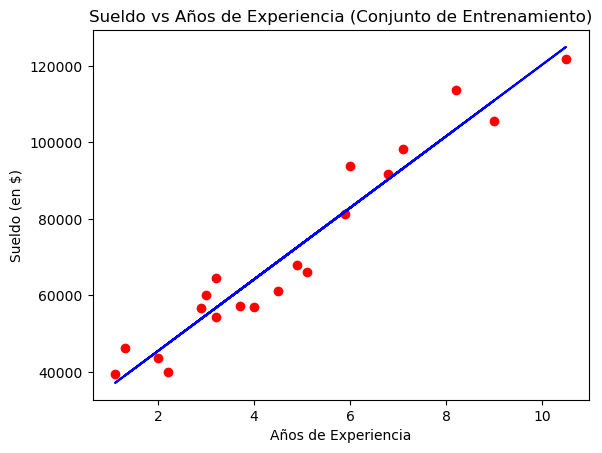

In [26]:
# El modelo encuentra la mejor recta de regresión con respecto a los datos de entrenamiento
plt.scatter(X_train, y_train, color = "red") # nube de puntos con observaciones de entrenamiento
plt.plot(X_train, regression.predict(X_train), color = "blue") # recta de regresión
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia") # variable independiente
plt.ylabel("Sueldo (en $)") # variable dependiente
plt.show()

# Visualizar los resultados de test


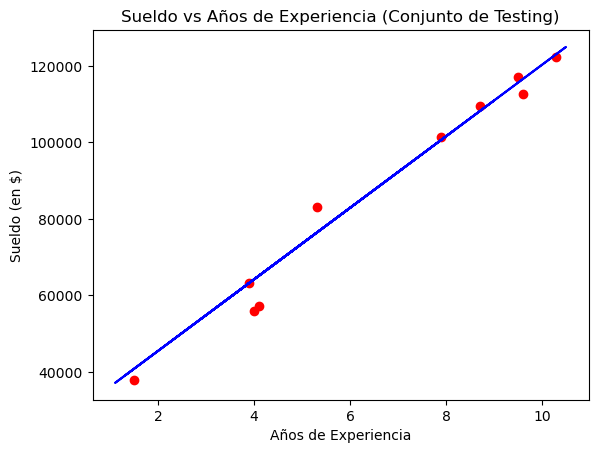

In [27]:
# Ubicamos los datos de test con respecto a la recta de regresión hecha con los datos de entrenamiento (vemos si se produjo Overffiting)
# Acá visualizamos el motivo por el que el modelo se ajustó mejor a unos datos en pos de otros (empleados infra y sobrevalorados)
plt.scatter(X_test, y_test, color = "red") # nube de puntos con observaciones de test
plt.plot(X_train, regression.predict(X_train), color = "blue") # la recta va a ser la misma (la ya entrenada con train)
plt.title("Sueldo vs Años de Experiencia (Conjunto de Testing)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

In [ ]:
# Vemos buenos resultados del modelo con respecto a observaciones nuevas (error pequeño)
# Hemos demostrado que la dependencia entre el sueldo y los años de expreriencia para este set de datos es lineal